# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **religious events or traditions** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **religious events or traditions**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **religious events or traditions**?  For this category you might consider calendar events, demographic data about religion in the region and neighboring regions, participation in religious events, or how religious events relate to political events, social movements, or historical events.

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load Self Described Religion data into SDR dataframe
SDR_df = pd.read_excel('SelfDescribedReligion75.xls',sheet_name='Data',header=3,skipfooter=13)
SDR_df.head()

,Religious Group,1990,2001,2008
0,"Adult population, total \1",175440,207983,228182
1,"Christian, total \2",151225,159514,173402
2,Catholic,46004,50873,57199
3,Baptist,33964,33820,36148
4,Protestant-no denomination supplied,17214,4647,5187


In [2]:
# clean data so we have integers to work with

# grab first two rows and store as seperate variables
adult_pop = SDR_df.loc[0]
christian_pop = SDR_df.loc[1]
SDR_df.drop(SDR_df.index[[0,52]],inplace=True)

years = [1990, 2001, 2008]

for year in years:
    SDR_df[year] = SDR_df[year].apply(lambda x: 0 if str(type(x))=="<class 'str'>" else x)



In [3]:
# remove extra characters from religious group entries and set as index
SDR_df['Religious Group'].replace(['^[ ]+(?=\w)','[ ][\\\][\d]'],'',regex=True,inplace=True)
SDR_df.set_index('Religious Group', inplace=True)

SDR_df.head()

,1990,2001,2008
Religious Group,,,
"Christian, total",151225,159514,173402
Catholic,46004,50873,57199
Baptist,33964,33820,36148
Protestant-no denomination supplied,17214,4647,5187
Methodist/Wesleyan,14174,14039,11366


In [4]:
# reorganize SDR dataframe and use multi index for populaiton percentages in each year
# add level to columns

SDR_df.columns = pd.MultiIndex.from_product([SDR_df.columns,['Total']])

for year in years:
    SDR_df[year,'Percent'] = SDR_df[year,'Total'] / adult_pop[year] * 100
    
SDR_df.sort_index(axis=1,inplace=True)

SDR_df.head()




#RG_df = pd.DataFrame(
#    SDR_df[['Religious Group']].values,
#    columns=pd.MultiIndex.from_tuples([('','Religious Group')])
#)

#Dates_dfs = [ pd.DataFrame(
#        list(zip(SDR_df[year].values, SDR_df[year] / adult_pop[year] * 100)),
#            columns=pd.MultiIndex.from_product( [ [year],
#        ['Total','Percentage'] ] ) )
#        for year in [1990,2001,2008] ]


#SDRp_df = pd.concat([RG_df] + Dates_dfs,axis=1)
#SDRp_df.head()


1990               2001          \
                                       Percent   Total    Percent   Total   
Religious Group                                                             
Christian, total                     86.197560  151225  76.695691  159514   
Catholic                             26.222070   46004  24.460172   50873   
Baptist                              19.359325   33964  16.260944   33820   
Protestant-no denomination supplied   9.811902   17214   2.234317    4647   
Methodist/Wesleyan                    8.079115   14174   6.750071   14039   

                                          2008          
                                       Percent   Total  
Religious Group                                         
Christian, total                     75.992848  173402  
Catholic                             25.067271   57199  
Baptist                              15.841740   36148  
Protestant-no denomination supplied   2.273185    5187  
Methodist/Wesleyan                    4.981112   11366

In [5]:
# clean and filter data for most prominent religions
# include Muslim and Jewish explicitly
# cutoff at 4% pop will give us 7 categories
TopReligions_df = SDR_df[(SDR_df[2008,'Percent'] >= 4.0)
                          | (SDR_df.index == 'Jewish')
                          | (SDR_df.index == 'Muslim')].copy()

TopReligions_df

1990               2001          \
                                      Percent   Total    Percent   Total   
Religious Group                                                            
Christian, total                    86.197560  151225  76.695691  159514   
Catholic                            26.222070   46004  24.460172   50873   
Baptist                             19.359325   33964  16.260944   33820   
Methodist/Wesleyan                   8.079115   14174   6.750071   14039   
Christian-no denomination supplied   4.601573    8073   6.822673   14190   
Jewish                               1.788076    3137   1.364054    2837   
Muslim                               0.300388     527   0.530813    1104   
No Religion specified, total         8.168605   14331  14.174716   29481   
No Religion                          7.476060   13116  13.215503   27486   

                                         2008          
                                      Percent   Total  
Religious Group                                        
Christian, total                    75.992848  173402  
Catholic                            25.067271   57199  
Baptist                             15.841740   36148  
Methodist/Wesleyan                   4.981112   11366  
Christian-no denomination supplied   7.377444   16834  
Jewish                               1.174501    2680  
Muslim                               0.591195    1349  
No Religion specified, total        14.974450   34169  
No Religion                         13.334531   30427

In [6]:
# drop unwanted categories
TopReligions_df.drop('No Religion',inplace=True)
#TopReligions_df.reset_index(drop=True,inplace=True)
TopReligions_df

1990               2001          \
                                      Percent   Total    Percent   Total   
Religious Group                                                            
Christian, total                    86.197560  151225  76.695691  159514   
Catholic                            26.222070   46004  24.460172   50873   
Baptist                             19.359325   33964  16.260944   33820   
Methodist/Wesleyan                   8.079115   14174   6.750071   14039   
Christian-no denomination supplied   4.601573    8073   6.822673   14190   
Jewish                               1.788076    3137   1.364054    2837   
Muslim                               0.300388     527   0.530813    1104   
No Religion specified, total         8.168605   14331  14.174716   29481   

                                         2008          
                                      Percent   Total  
Religious Group                                        
Christian, total                    75.992848  173402  
Catholic                            25.067271   57199  
Baptist                             15.841740   36148  
Methodist/Wesleyan                   4.981112   11366  
Christian-no denomination supplied   7.377444   16834  
Jewish                               1.174501    2680  
Muslim                               0.591195    1349  
No Religion specified, total        14.974450   34169

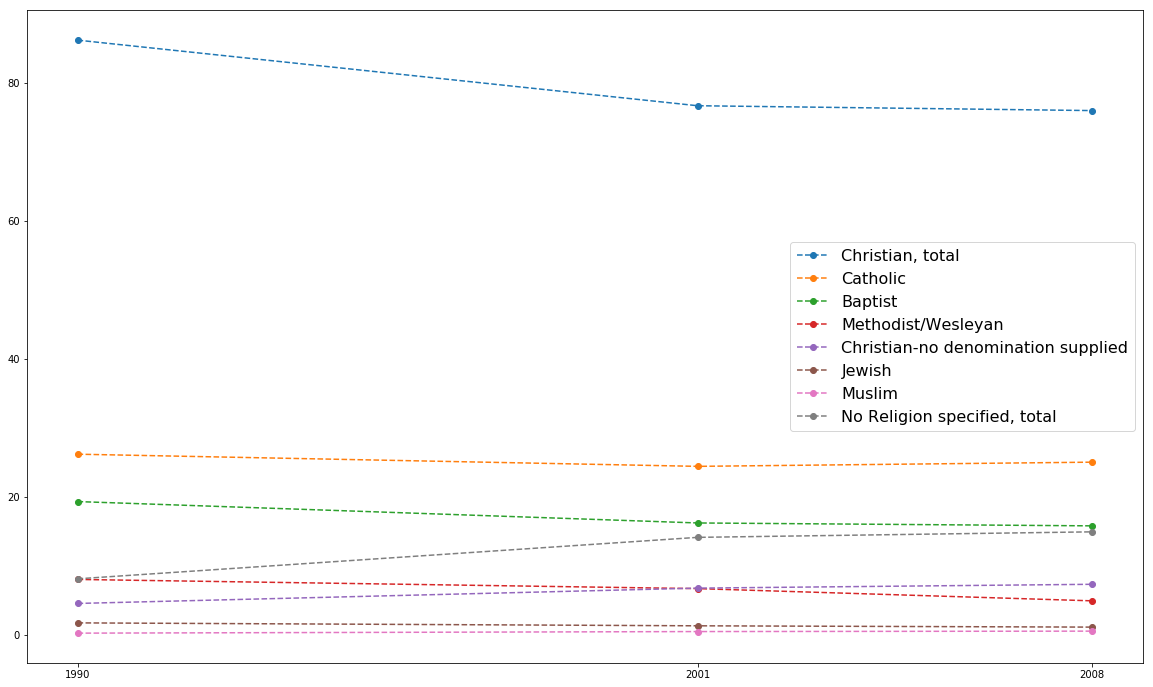

In [7]:
# plot each top religious group's percentage of population over time
import matplotlib.pyplot as plt
groups_dict = {}

plt.figure(0,figsize=(20,12))
ax0 = plt.subplot()
ax0.set_xticks(years)

for group in TopReligions_df.index:
    # use mask for each group, slice only percentage subcolumn from each year column
    groups_dict[group] = list(TopReligions_df[TopReligions_df.index
                                              == group][TopReligions_df.columns[0:7:2]].iloc[0])
    
    plt.plot(years,groups_dict[group],linestyle='dashed',marker='o',label=group)
    
    ax0.annotate

plt.legend(prop = {'size':16})

plt.show()

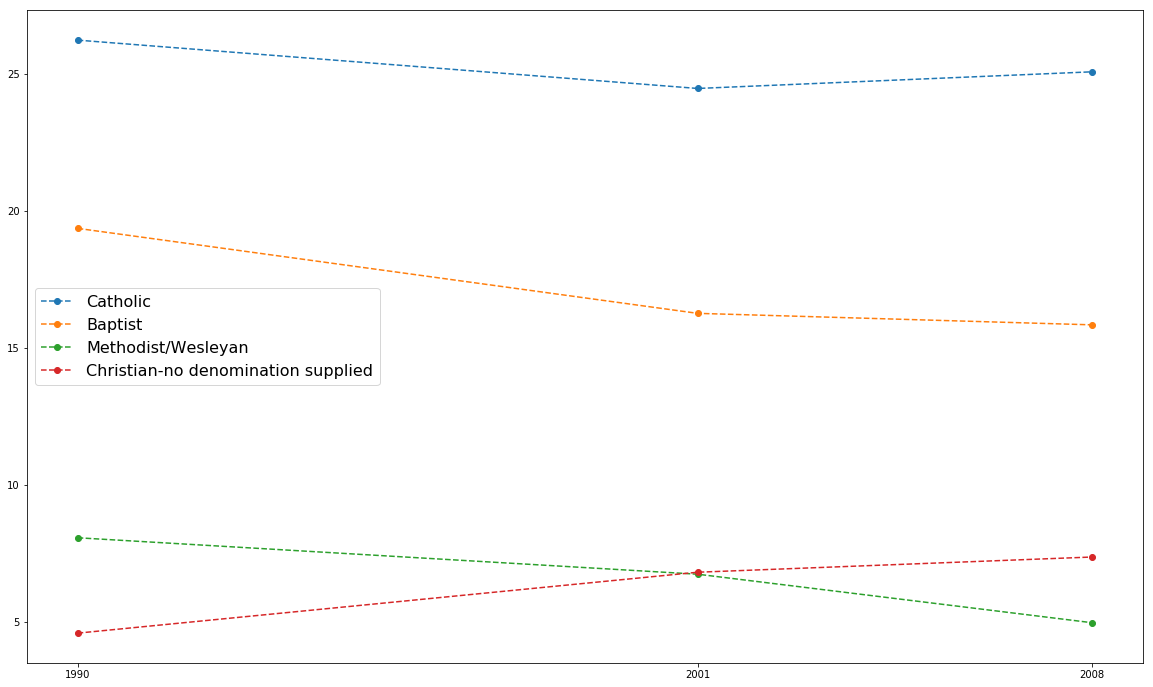

In [8]:
# separate into two plots, christian religions then islam & no religion
plt.figure(1,figsize=(20,12))
ax1 = plt.subplot()
ax1.set_xticks(years)

for group in TopReligions_df.index[1:5]:
    # use mask for each group, slice only percentage subcolumn from each year column
    groups_dict[group] = list(TopReligions_df[TopReligions_df.index
                                              == group][TopReligions_df.columns[0:7:2]].iloc[0])
    plt.plot(years,groups_dict[group],linestyle='dashed',marker='o',label=group)

plt.legend(prop = {'size':16})
plt.show()

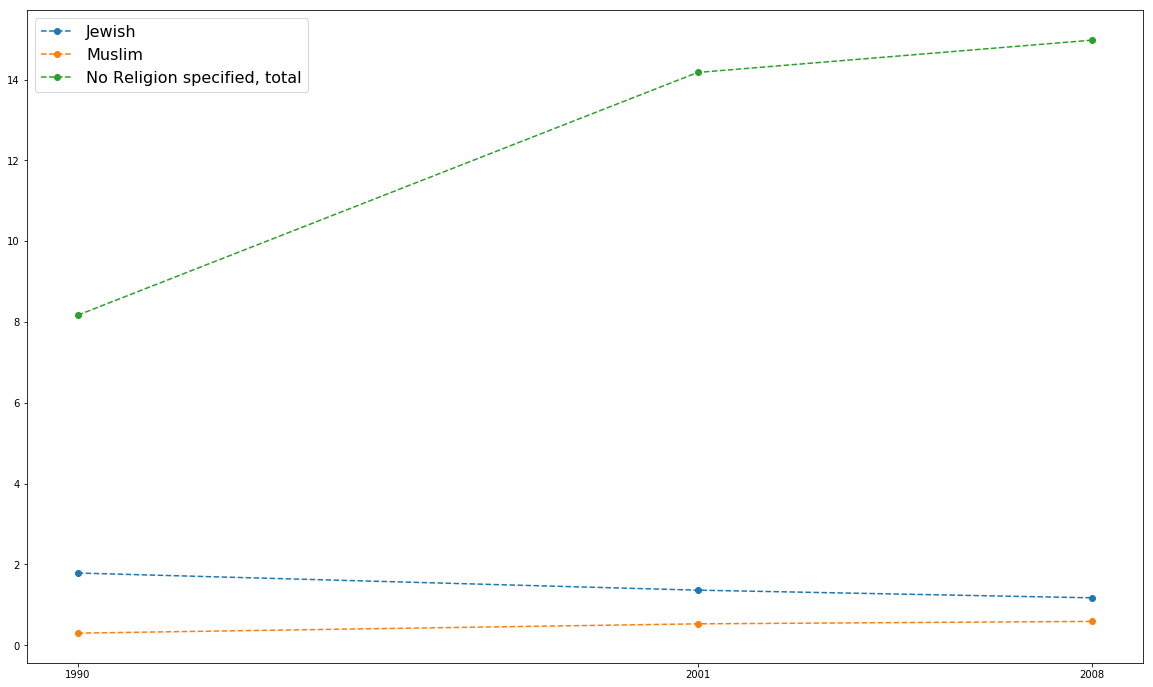

In [9]:
plt.figure(2,figsize=(20,12))
ax2 = plt.subplot()
ax2.set_xticks(years)

for group in TopReligions_df.index[5:8]:
    # use mask for each group, slice only percentage subcolumn from each year column
    groups_dict[group] = list(TopReligions_df[TopReligions_df.index
                                              == group][TopReligions_df.columns[0:7:2]].iloc[0])
    plt.plot(years,groups_dict[group],linestyle='dashed',marker='o',label=group)

plt.legend(prop = {'size':16})
plt.show()

In [10]:
# Compare to new datasets detailing the racial demographics of the US from 1990 to 2008
PopByRace2000_df = pd.read_excel('PopByRace1990-2000tab04.xls', header = [21,31], skipfooter=13)
PopByRace2000_df

1990 Census         \
                                                            (1)    (2)   
RACE                                                        NaN    NaN   
         Total population3 ……………………………….            248709873.0  100.0   
White ………………………………………………………..                       199686070.0   80.3   
Black or African American ……………………………..              29986060.0   12.1   
American Indian and Alaska Native ……………………            1959234.0    0.8   
Asian …………………………………………………………                          6908638.0    2.8   
Native Hawaiian and Other Pacific Islander …………...     365024.0    0.1   
Some other race ………………………………………….                     9804847.0    3.9   
NaN                                                         NaN    NaN   
HISPANIC OR LATINO AND RACE                                 NaN    NaN   
         Total population3 ……………………………….            248709873.0  100.0   
Hispanic or Latino (of any race)3 …………………..          22354059.0    9.0   
Not Hispanic or Latino3 ………………………………                226355814.0   91.0   
    White ………………………………………………………..                   188128296.0   75.6   
    Black or African American ……………………………..          29216293.0   11.7   
    American Indian and Alaska Native ……………………        1793773.0    0.7   
    Asian …………………………………………………………                      6642481.0    2.7   
    Native Hawaiian and Other Pacific Islander ...     325878.0    0.1   
    Some other race ………………………………………….                  249093.0    0.1   

                                                    Census 2000               \
                                                            (3)          (4)   
RACE                                                        NaN          NaN   
         Total population3 ……………………………….            281421906.0  281421906.0   
White ………………………………………………………..                       211460626.0  216930975.0   
Black or African American ……………………………..              34658190.0   36419434.0   
American Indian and Alaska Native ……………………            2475956.0    4119301.0   
Asian …………………………………………………………                         10242998.0   11898828.0   
Native Hawaiian and Other Pacific Islander …………...     398835.0     874414.0   
Some other race ………………………………………….                    15359073.0   18521486.0   
NaN                                                         NaN          NaN   
HISPANIC OR LATINO AND RACE                                 NaN          NaN   
         Total population3 ……………………………….            281421906.0  281421906.0   
Hispanic or Latino (of any race)3 …………………..          35305818.0   35305818.0   
Not Hispanic or Latino3 ………………………………                246116088.0  246116088.0   
    White ………………………………………………………..                   194552774.0  198177900.0   
    Black or African American ……………………………..          33947837.0   35383751.0   
    American Indian and Alaska Native ……………………        2068883.0    3444700.0   
    Asian …………………………………………………………                     10123169.0   11579494.0   
    Native Hawaiian and Other Pacific Islander ...     353509.0     748149.0   
    Some other race ………………………………………….                  467770.0    1770645.0   

                                                   Difference between 1990 and 2000  \
                                                                                (5)   
RACE                                                                                  
         Total population3 ……………………………….                                   32712033   
White ………………………………………………………..                                              11774556   
Black or African American ……………………………..                                     4672130   
American Indian and Alaska Native ……………………                                   516722   
Asian …………………………………………………………                                                3334360   
Native Hawaiian and Other Pacific Islander …………...                            33811   
Some other race ………………………………………….

In [11]:
PopByRace2000_df.drop(['(7)','(8)'],axis=1,level=1,inplace=True)
PopByRace2000_df.rename(columns = {'(1)':'Total','(2)':'Percent','(3)':'Total',
                                   '(4)':'','(5)':'Total','(6)':'Percent Increase'},inplace=True)


In [12]:
# add percentage column for year 2000
pop2000 = PopByRace2000_df['Census 2000']['Total'][1]
#drop unwanted column from Census 2000, replace with Percent column to match Census 1990
PopByRace2000_df.drop('',1,level=1,inplace=True)
PopByRace2000_df['Census 2000','Percent'] = PopByRace2000_df['Census 2000','Total']/pop2000*100
PopByRace2000_df.sort_index(axis=1,inplace=True)

PopByRace2000_df.dropna(inplace=True)
PopByRace2000_df

1990 Census               \
                                                       Percent        Total   
         Total population3 ……………………………….                 100.0  248709873.0   
White ………………………………………………………..                             80.3  199686070.0   
Black or African American ……………………………..                   12.1   29986060.0   
American Indian and Alaska Native ……………………                 0.8    1959234.0   
Asian …………………………………………………………                               2.8    6908638.0   
Native Hawaiian and Other Pacific Islander …………...         0.1     365024.0   
Some other race ………………………………………….                          3.9    9804847.0   
         Total population3 ……………………………….                 100.0  248709873.0   
Hispanic or Latino (of any race)3 …………………..                9.0   22354059.0   
Not Hispanic or Latino3 ………………………………                      91.0  226355814.0   
    White ………………………………………………………..                         75.6  188128296.0   
    Black or African American ……………………………..               11.7   29216293.0   
    American Indian and Alaska Native ……………………             0.7    1793773.0   
    Asian …………………………………………………………                           2.7    6642481.0   
    Native Hawaiian and Other Pacific Islander ...         0.1     325878.0   
    Some other race ………………………………………….                      0.1     249093.0   

                                                   Census 2000               \
                                                       Percent        Total   
         Total population3 ……………………………….            100.000000  281421906.0   
White ………………………………………………………..                        75.140073  211460626.0   
Black or African American ……………………………..              12.315385   34658190.0   
American Indian and Alaska Native ……………………            0.879802    2475956.0   
Asian …………………………………………………………                          3.639730   10242998.0   
Native Hawaiian and Other Pacific Islander …………...    0.141721     398835.0   
Some other race ………………………………………….                     5.457668   15359073.0   
         Total population3 ……………………………….            100.000000  281421906.0   
Hispanic or Latino (of any race)3 …………………..          12.545512   35305818.0   
Not Hispanic or Latino3 ………………………………                 87.454488  246116088.0   
    White ………………………………………………………..                    69.132065  194552774.0   
    Black or African American ……………………………..          12.062969   33947837.0   
    American Indian and Alaska Native ……………………        0.735154    2068883.0   
    Asian …………………………………………………………                      3.597150   10123169.0   
    Native Hawaiian and Other Pacific Islander ...    0.125615     353509.0   
    Some other race ………………………………………….                 0.166217     467770.0   

                                                   Difference between 1990 and 2000  \
                                                                   Percent Increase   
         Total population3 ……………………………….                                       13.2   
White ………………………………………………………..                                                   5.9   
Black or African American ……………………………..                                        15.6   
American Indian and Alaska Native ……………………                                     26.4   
Asian …………………………………………………………                                                   48.3   
Native Hawaiian and Other Pacific Islander …………...                              9.3   
Some other race ………………………………………….                                              56.6   
         Total population3 ……………………………….                                       13.2   
Hispanic or Latino (of any race)3 …………………..                                    57.9   
Not Hispanic or Latino3 ………………………………                                            8.7   
    White ………………………………………………………..                                               3.4   
    Black or African American ……………………………..                               

In [13]:
# interested in following categories: hispanic(any race), white, black, indian, asian
PopByRace2000_df = PopByRace2000_df['Hispanic or Latino (of any race)3 …………………..':]
PopByRace2000_df

1990 Census               \
                                                       Percent        Total   
Hispanic or Latino (of any race)3 …………………..                9.0   22354059.0   
Not Hispanic or Latino3 ………………………………                      91.0  226355814.0   
    White ………………………………………………………..                         75.6  188128296.0   
    Black or African American ……………………………..               11.7   29216293.0   
    American Indian and Alaska Native ……………………             0.7    1793773.0   
    Asian …………………………………………………………                           2.7    6642481.0   
    Native Hawaiian and Other Pacific Islander ...         0.1     325878.0   
    Some other race ………………………………………….                      0.1     249093.0   

                                                   Census 2000               \
                                                       Percent        Total   
Hispanic or Latino (of any race)3 …………………..          12.545512   35305818.0   
Not Hispanic or Latino3 ………………………………                 87.454488  246116088.0   
    White ………………………………………………………..                    69.132065  194552774.0   
    Black or African American ……………………………..          12.062969   33947837.0   
    American Indian and Alaska Native ……………………        0.735154    2068883.0   
    Asian …………………………………………………………                      3.597150   10123169.0   
    Native Hawaiian and Other Pacific Islander ...    0.125615     353509.0   
    Some other race ………………………………………….                 0.166217     467770.0   

                                                   Difference between 1990 and 2000  \
                                                                   Percent Increase   
Hispanic or Latino (of any race)3 …………………..                                    57.9   
Not Hispanic or Latino3 ………………………………                                            8.7   
    White ………………………………………………………..                                               3.4   
    Black or African American ……………………………..                                    16.2   
    American Indian and Alaska Native ……………………                                 15.3   
    Asian …………………………………………………………                                               52.4   
    Native Hawaiian and Other Pacific Islander ...                              8.5   
    Some other race ………………………………………….                                          87.8   

                                                              
                                                       Total  
Hispanic or Latino (of any race)3 …………………..         12951759  
Not Hispanic or Latino3 ………………………………                19760274  
    White ………………………………………………………..                    6424478  
    Black or African American ……………………………..          4731544  
    American Indian and Alaska Native ……………………        275110  
    Asian …………………………………………………………                     3480688  
    Native Hawaiian and Other Pacific Islander ...     27631  
    Some other race ………………………………………….                 218677

In [14]:
PopByRace2000_df = PopByRace2000_df.drop([PopByRace2000_df.index[1],PopByRace2000_df.index[6],
                       PopByRace2000_df.index[7]])
PopByRace2000_df

1990 Census               \
                                                   Percent        Total   
Hispanic or Latino (of any race)3 …………………..            9.0   22354059.0   
    White ………………………………………………………..                     75.6  188128296.0   
    Black or African American ……………………………..           11.7   29216293.0   
    American Indian and Alaska Native ……………………         0.7    1793773.0   
    Asian …………………………………………………………                       2.7    6642481.0   

                                               Census 2000               \
                                                   Percent        Total   
Hispanic or Latino (of any race)3 …………………..      12.545512   35305818.0   
    White ………………………………………………………..                69.132065  194552774.0   
    Black or African American ……………………………..      12.062969   33947837.0   
    American Indian and Alaska Native ……………………    0.735154    2068883.0   
    Asian …………………………………………………………                  3.597150   10123169.0   

                                               Difference between 1990 and 2000  \
                                                               Percent Increase   
Hispanic or Latino (of any race)3 …………………..                                57.9   
    White ………………………………………………………..                                           3.4   
    Black or African American ……………………………..                                16.2   
    American Indian and Alaska Native ……………………                             15.3   
    Asian …………………………………………………………                                           52.4   

                                                          
                                                   Total  
Hispanic or Latino (of any race)3 …………………..     12951759  
    White ………………………………………………………..                6424478  
    Black or African American ……………………………..      4731544  
    American Indian and Alaska Native ……………………    275110  
    Asian …………………………………………………………                 3480688

In [15]:
newIndex = ['Hispanic or Latino','White','Black','American Indian','Asian']
PopByRace2000_df.rename( dict(zip(list(PopByRace2000_df.index),newIndex)),inplace=True)
PopByRace2000_df

1990 Census              Census 2000               \
                       Percent        Total     Percent        Total   
Hispanic or Latino         9.0   22354059.0   12.545512   35305818.0   
White                     75.6  188128296.0   69.132065  194552774.0   
Black                     11.7   29216293.0   12.062969   33947837.0   
American Indian            0.7    1793773.0    0.735154    2068883.0   
Asian                      2.7    6642481.0    3.597150   10123169.0   

                   Difference between 1990 and 2000            
                                   Percent Increase     Total  
Hispanic or Latino                             57.9  12951759  
White                                           3.4   6424478  
Black                                          16.2   4731544  
American Indian                                15.3    275110  
Asian                                          52.4   3480688

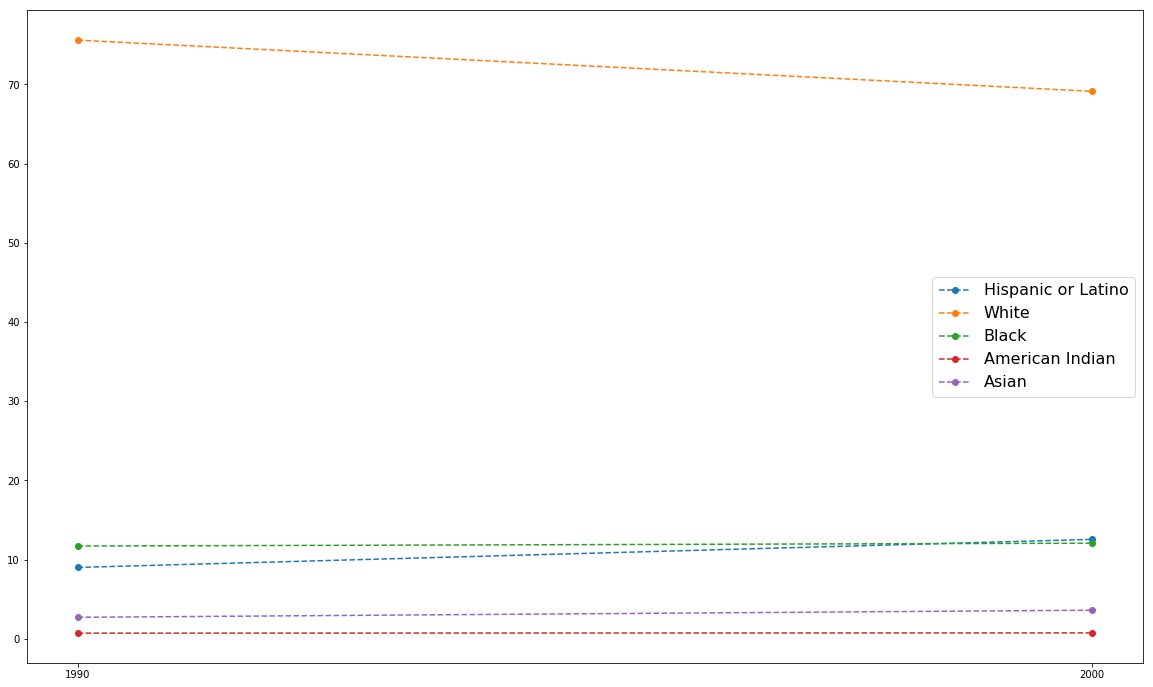

In [16]:
census1 = [1990,2000]

plt.figure(3,figsize=(20,12))
ax3 = plt.subplot()
ax3.set_xticks(census1)

for race in PopByRace2000_df.index:
    plt.plot(census1,[PopByRace2000_df.loc[race,'1990 Census']['Percent'],
                      PopByRace2000_df.loc[race,'Census 2000']['Percent']],
             linestyle='dashed',marker='o',label=race)
    
plt.legend(prop = {'size':16})
plt.show()

In [17]:
# load demographic data for 2000-2008 to compare to religion data
PopByRaceAndSex2009_df = pd.read_excel('ResidentPopByRace2009-6.xls', header = 4, skipfooter = 9)
PopByRaceAndSex2009_df.head()

,2000 Census,2000 Estimates Base \1,2000 (July),2001 (July),2002 (July),2003 (July),2004 (July),2005 (July),2006 (July),2007 (July),2008 (July),2009 (July),Unnamed: 12
BOTH SEXES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Total,281421906.0,281424602.0,282171957.0,285081556.0,287803914.0,290326418.0,293045739.0,295753151.0,298593212.0,301579895.0,304374846.0,307006550.0,9.090160
One race,277524226.0,277526880.0,278239086.0,281003436.0,283583034.0,285963450.0,288532033.0,291086928.0,293768055.0,296587154.0,299216154.0,301683044.0,8.704081
..White,228104485.0,228106500.0,228602436.0,230473133.0,232209323.0,233812712.0,235550306.0,237251255.0,239046846.0,240947306.0,242685070.0,244298393.0,7.098392
..Black or African American,35704124.0,35704871.0,35807824.0,36236186.0,36631278.0,36982820.0,37395645.0,37813066.0,38260797.0,38741771.0,39204596.0,39641060.0,11.024235


In [18]:
# drop data for individual sexes
PopByRaceLong2009_df = PopByRaceAndSex2009_df[:PopByRaceAndSex2009_df.index.get_loc('MALE')].dropna()

PopByRaceLong2009_df.head()

,2000 Census,2000 Estimates Base \1,2000 (July),2001 (July),2002 (July),2003 (July),2004 (July),2005 (July),2006 (July),2007 (July),2008 (July),2009 (July),Unnamed: 12
Total,281421906.0,281424602.0,282171957.0,285081556.0,287803914.0,290326418.0,293045739.0,295753151.0,298593212.0,301579895.0,304374846.0,307006550.0,9.090160
One race,277524226.0,277526880.0,278239086.0,281003436.0,283583034.0,285963450.0,288532033.0,291086928.0,293768055.0,296587154.0,299216154.0,301683044.0,8.704081
..White,228104485.0,228106500.0,228602436.0,230473133.0,232209323.0,233812712.0,235550306.0,237251255.0,239046846.0,240947306.0,242685070.0,244298393.0,7.098392
..Black or African American,35704124.0,35704871.0,35807824.0,36236186.0,36631278.0,36982820.0,37395645.0,37813066.0,38260797.0,38741771.0,39204596.0,39641060.0,11.024235
..American Indian and Alaska Native,2663818.0,2663851.0,2675900.0,2725594.0,2774108.0,2821438.0,2871748.0,2924141.0,2978564.0,3037691.0,3095246.0,3151284.0,18.298058


In [19]:
# want only hispanic(any race), white, black, indian, asian categories to match previous data

#PopByRaceLong2009_df.drop(PopByRaceLong2009_df.columns[[0,1,12]],axis=1,inplace=True)

PopByRace2009_df = PopByRaceLong2009_df.iloc[[15,16,17,18,26]].drop(PopByRaceLong2009_df.columns[[0,1,12]],axis=1)

total_pop = PopByRaceLong2009_df.iloc[0].drop(PopByRaceLong2009_df.columns[[0,1,12]])

newIndex2 = ['White','Black','American Indian','Asian','Hispanic or Latino']
census2 = list(range(2000,2010))
PopByRace2009_df.index = newIndex2
#PopByRace2009_df.rename( dict(zip(list(PopByRace2009_df.index),newIndex2)),inplace=True)
PopByRace2009_df.columns = census2
total_pop.index = census2

print(total_pop)

PopByRace2009_df


2000    282171957.0
2001    285081556.0
2002    287803914.0
2003    290326418.0
2004    293045739.0
2005    295753151.0
2006    298593212.0
2007    301579895.0
2008    304374846.0
2009    307006550.0
Name:     Total, dtype: float64


,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009
White,195762792.0,196331623.0,196779221.0,197145986.0,197648153.0,198073955.0,198549475.0,199109472.0,199529117.0,199851240.0
Black,34404883.0,34784231.0,35134622.0,35441833.0,35800716.0,36149588.0,36524175.0,36930832.0,37318578.0,37681544.0
American Indian,2104243.0,2132232.0,2159293.0,2184921.0,2213284.0,2241704.0,2270979.0,2302367.0,2332222.0,2360807.0
Asian,10452666.0,10846283.0,11225164.0,11583246.0,11928543.0,12288801.0,12648451.0,13002824.0,13348969.0,13686083.0
Hispanic or Latino,35642379.0,37052612.0,38445001.0,39785986.0,41139092.0,42552292.0,44017430.0,45508492.0,46978568.0,48419324.0


In [20]:
# add index level to columns to match previous demographic dataframe

PopByRace2009_df.columns = pd.MultiIndex.from_product([PopByRace2009_df.columns,['Total']])


for year in census2:
    PopByRace2009_df[year,'Percent'] = PopByRace2009_df[year,'Total'] / total_pop[year] * 100

PopByRace2009_df.sort_index(axis=1,inplace=True)

PopByRace2009_df

2000                    2001                    2002  \
                      Percent        Total    Percent        Total    Percent   
White               69.377125  195762792.0  68.868581  196331623.0  68.372670   
Black               12.192878   34404883.0  12.201502   34784231.0  12.207833   
American Indian      0.745731    2104243.0   0.747938    2132232.0   0.750265   
Asian                3.704360   10452666.0   3.804625   10846283.0   3.900282   
Hispanic or Latino  12.631439   35642379.0  12.997197   37052612.0  13.358054   

                                      2003                    2004  \
                          Total    Percent        Total    Percent   
White               196779221.0  67.904942  197145986.0  67.446179   
Black                35134622.0  12.207581   35441833.0  12.216767   
American Indian       2159293.0   0.752574    2184921.0   0.755269   
Asian                11225164.0   3.989732   11583246.0   4.070540   
Hispanic or Latino   38445001.0  13.703881   39785986.0  14.038454   

                                      2005                    2006  \
                          Total    Percent        Total    Percent   
White               197648153.0  66.972729  198073955.0  66.494973   
Black                35800716.0  12.222892   36149588.0  12.232085   
American Indian       2213284.0   0.757965    2241704.0   0.760559   
Asian                11928543.0   4.155087   12288801.0   4.236014   
Hispanic or Latino   41139092.0  14.387773   42552292.0  14.741604   

                                      2007                    2008  \
                          Total    Percent        Total    Percent   
White               198549475.0  66.022131  199109472.0  65.553747   
Black                36524175.0  12.245787   36930832.0  12.260730   
American Indian       2270979.0   0.763435    2302367.0   0.766233   
Asian                12648451.0   4.311569   13002824.0   4.385700   
Hispanic or Latino   44017430.0  15.090028   45508492.0  15.434445   

                                      2009               
                          Total    Percent        Total  
White               199529117.0  65.096735  199851240.0  
Black                37318578.0  12.273857   37681544.0  
American Indian       2332222.0   0.768976    2360807.0  
Asian                13348969.0   4.457912   13686083.0  
Hispanic or Latino   46978568.0  15.771430   48419324.0

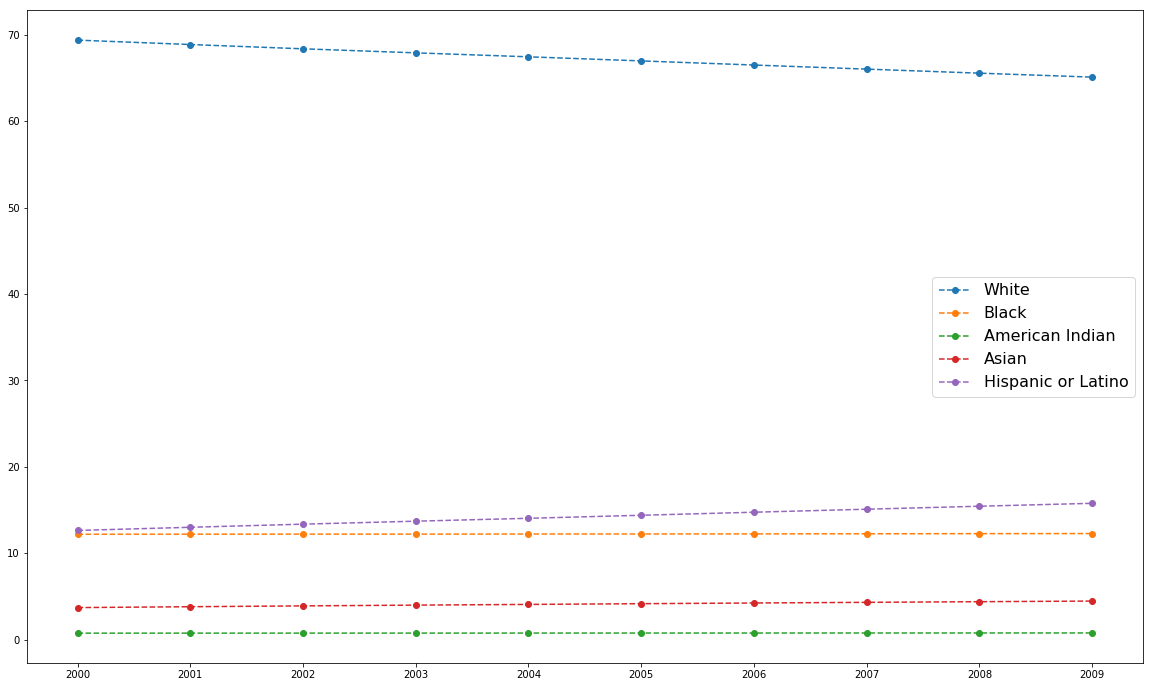

In [21]:
plt.figure(4,figsize=(20,12))
ax4 = plt.subplot()
ax4.set_xticks(census2)

for race in PopByRace2009_df.index:
    # use mask for each group, slice only percentage subcolumn from each year column
    groups_dict[race] = list(PopByRace2009_df[PopByRace2009_df.index
                                              == race][PopByRace2009_df.columns[0:21:2]].iloc[0])
    plt.plot(census2,groups_dict[race],linestyle='dashed',marker='o',label=race)

plt.legend(prop = {'size':16})
plt.show()

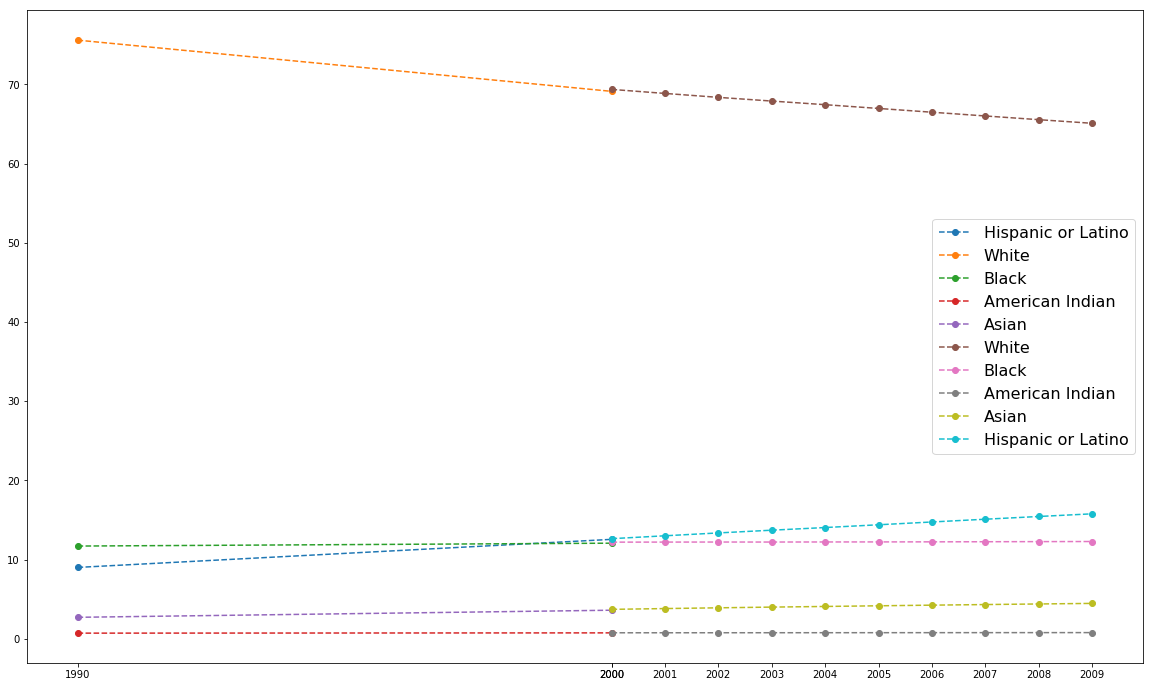

In [22]:
# want population demographics in a single plot
plt.figure(5,figsize=(20,12))
ax5 = plt.subplot()


ax5.set_xticks(census1 + census2)

for race in PopByRace2000_df.index:
    plt.plot(census1,[PopByRace2000_df.loc[race,'1990 Census']['Percent'],
                      PopByRace2000_df.loc[race,'Census 2000']['Percent']],
             linestyle='dashed',marker='o',label=race)

for race in PopByRace2009_df.index:
    # use mask for each group, slice only percentage subcolumn from each year column
    groups_dict[race] = list(PopByRace2009_df[PopByRace2009_df.index
                                              == race][PopByRace2009_df.columns[0:21:2]].iloc[0])
    plt.plot(census2,groups_dict[race],linestyle='dashed',marker='o',label=race)

plt.legend(prop = {'size':16})
plt.show()


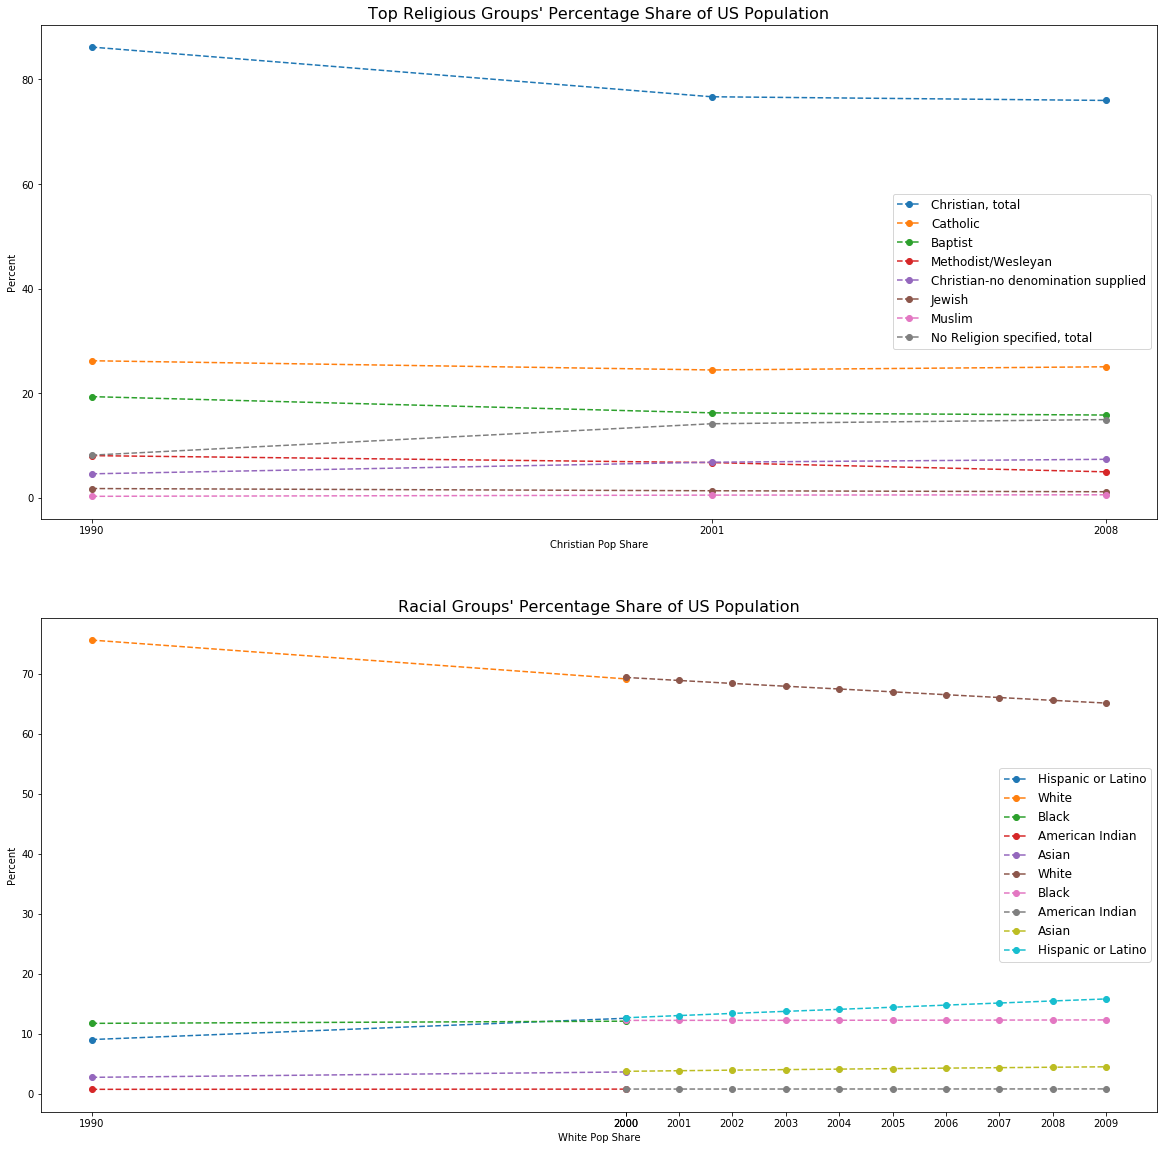

In [23]:
# put two complete plots next to each other for comparison

fig, (ax6, ax7) = plt.subplots(2, 1, figsize = (20,20))


for group in TopReligions_df.index:
    groups_dict[group] = list(TopReligions_df[TopReligions_df.index
                                              == group][TopReligions_df.columns[0:7:2]].iloc[0])
    ax6.plot(years,groups_dict[group],linestyle='dashed',marker='o',label=group)
    
ax6.set_xticks(years)
ax6.legend(prop = {'size':12})
ax6.set_title('Top Religious Groups\' Percentage Share of US Population',fontsize=16)
ax6.set_xlabel('Christian Pop Share')
ax6.set_ylabel('Percent')


for race in PopByRace2000_df.index:
    ax7.plot(census1,[PopByRace2000_df.loc[race,'1990 Census']['Percent'],
                      PopByRace2000_df.loc[race,'Census 2000']['Percent']],
             linestyle='dashed',marker='o',label=race)

for race in PopByRace2009_df.index:
    # use mask for each group, slice only percentage subcolumn from each year column
    groups_dict[race] = list(PopByRace2009_df[PopByRace2009_df.index
                                              == race][PopByRace2009_df.columns[0:21:2]].iloc[0])
    ax7.plot(census2,groups_dict[race],linestyle='dashed',marker='o',label=race)

ax7.set_xticks(census1 + census2)
ax7.legend(prop = {'size':12})
ax7.set_title('Racial Groups\' Percentage Share of US Population',fontsize=16)
ax7.set_xlabel('White Pop Share')
ax7.set_ylabel('Percent')

plt.show()

In [24]:
TopReligions_df.loc['Non-Christian'] = TopReligions_df.iloc[5:8].apply(np.sum)
#print(TopReligions_df)
PopByRace2000_df.loc['Non-White'] = PopByRace2000_df.drop('White').apply(np.sum)
#print(PopByRace2000_df)
PopByRace2009_df.loc['Non-White'] = PopByRace2009_df.drop('White').apply(np.sum)
#print(PopByRace2009_df)

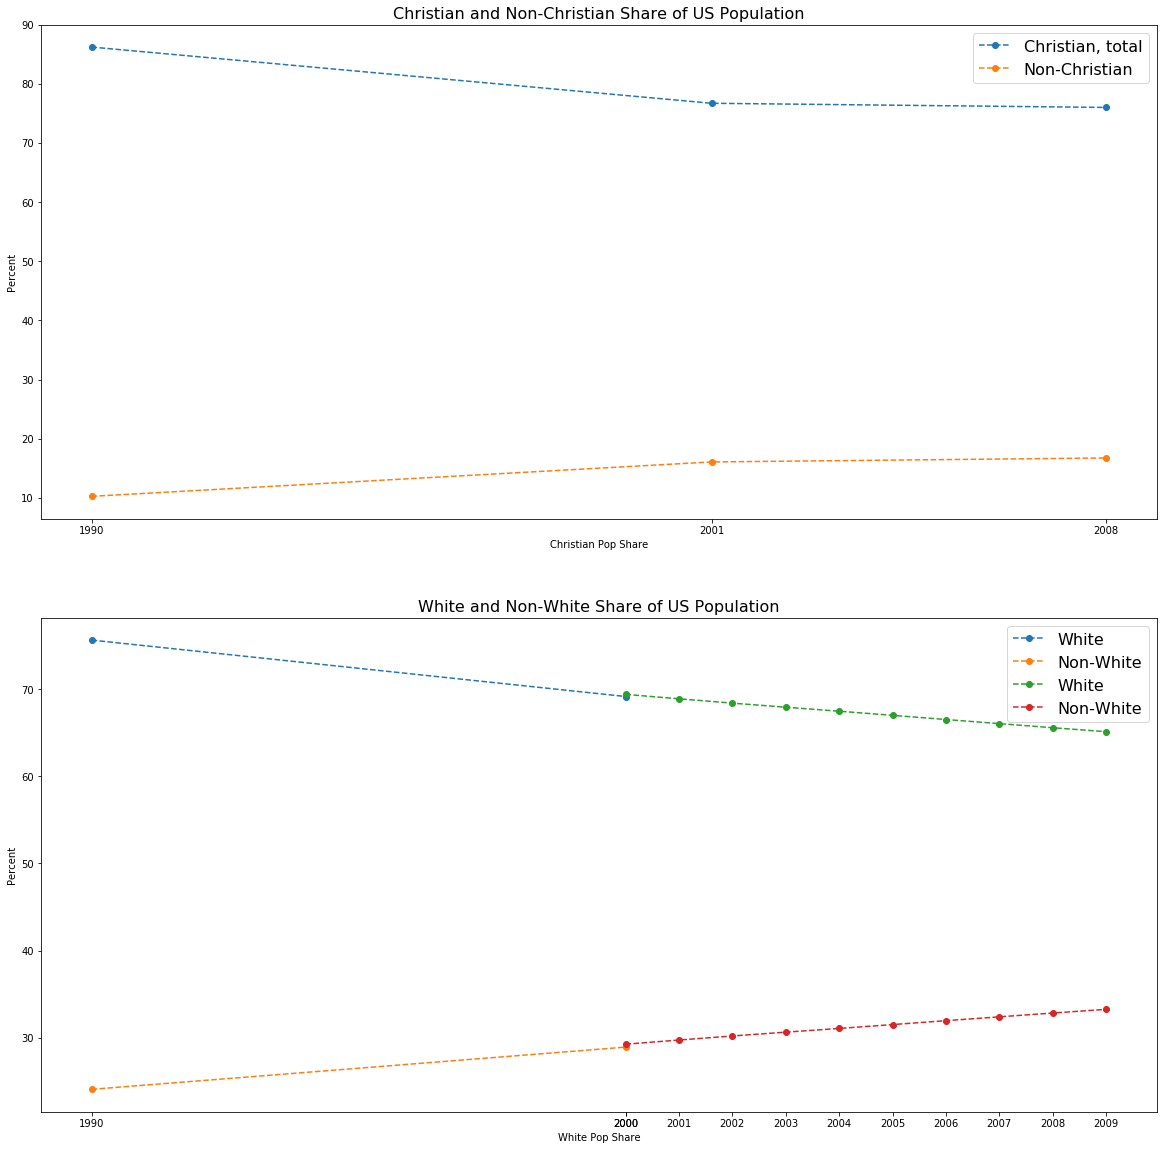

In [25]:
# want to answer a question about correlation between the datasets but possible correlation is not clearly shown
# alter/simplify plotted data to show christian vs non-christian population
# as well as white vs non-white population over time

fig, (ax8, ax9) = plt.subplots(2, 1, figsize = (20,20))


for group in ['Christian, total','Non-Christian']:
    # use mask for each group, slice only percentage subcolumn from each year column
    groups_dict[group] = list(TopReligions_df[TopReligions_df.index
                                              == group][TopReligions_df.columns[0:7:2]].iloc[0])
    ax8.plot(years,groups_dict[group],linestyle='dashed',marker='o',label=group)

ax8.set_xticks(years)
ax8.legend(prop = {'size':16})
ax8.set_title('Christian and Non-Christian Share of US Population',fontsize=16)
ax8.set_xlabel('Christian Pop Share')
ax8.set_ylabel('Percent')


for race in ['White','Non-White']:
    ax9.plot(census1,[PopByRace2000_df.loc[race,'1990 Census']['Percent'],
                      PopByRace2000_df.loc[race,'Census 2000']['Percent']],
             linestyle='dashed',marker='o',label=race)

for race in ['White','Non-White']:
    groups_dict[race] = list(PopByRace2009_df[PopByRace2009_df.index
                                              == race][PopByRace2009_df.columns[0:21:2]].iloc[0])
    ax9.plot(census2,groups_dict[race],linestyle='dashed',marker='o',label=race)

ax9.set_xticks(census1 + census2)
ax9.legend(prop = {'size':16})
ax9.set_title('White and Non-White Share of US Population',fontsize=16)
ax9.set_xlabel('White Pop Share')
ax9.set_ylabel('Percent')

plt.show()

In [26]:
from scipy import interpolate

In [27]:
christian_pop_data = list(TopReligions_df[TopReligions_df.index
                                              == 'Christian, total'][TopReligions_df.columns[0:7:2]].iloc[0])

christian_interp = interpolate.interp1d(years,christian_pop_data)

white_pop_data = [PopByRace2000_df.loc['White','1990 Census']['Percent'],
 PopByRace2000_df.loc['White','Census 2000']['Percent']] + list(PopByRace2009_df[PopByRace2009_df.index
                                              == 'White'][PopByRace2009_df.columns[0:21:2]].iloc[0])

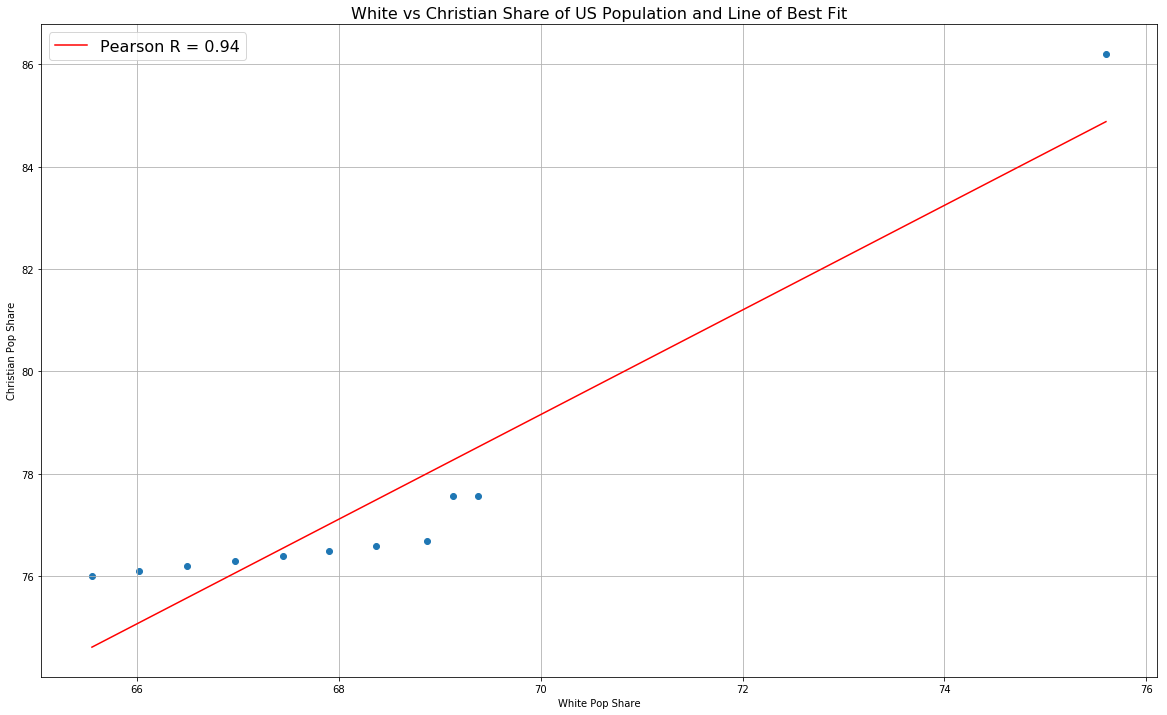

In [28]:
plt.figure(6,figsize=(20,12))

# include pearson correlation
pearR = np.corrcoef(white_pop_data[:-1],christian_interp(census1 + census2[:-1]))[1,0]

# plot scatter
plt.scatter(white_pop_data[:-1],christian_interp(census1 + census2[:-1]))

# add line of best fit with polyfit
fit_line = np.poly1d(np.polyfit(white_pop_data[:-1],
                              christian_interp(census1 + census2[:-1]), 1))(np.unique(white_pop_data[:-1]))
                                                                            

plt.plot(np.unique(white_pop_data[:-1]),fit_line,color='red',label='Pearson R = %.2f'%(pearR))

#plt.xlim([65, 76])
#plt.ylim([72, 90])
plt.title('White vs Christian Share of US Population and Line of Best Fit',fontsize=16)
plt.xlabel('White Pop Share')
plt.ylabel('Christian Pop Share')
plt.legend(prop = {'size':16})

plt.grid()

plt.show()

In [29]:
import matplotlib.gridspec as gs

In [30]:
plt.figure(figsize=(24,18))

gspec = gs.GridSpec(2, 2)
TopReligions_TL = plt.subplot(gspec[0,0])
RacePop_ML = plt.subplot(gspec[1,0])
Christian_TR = plt.subplot(gspec[0,1])
White_MR = plt.subplot(gspec[1,1])
#CorrBestFit_B = plt.subplot(gspec[2,0:])

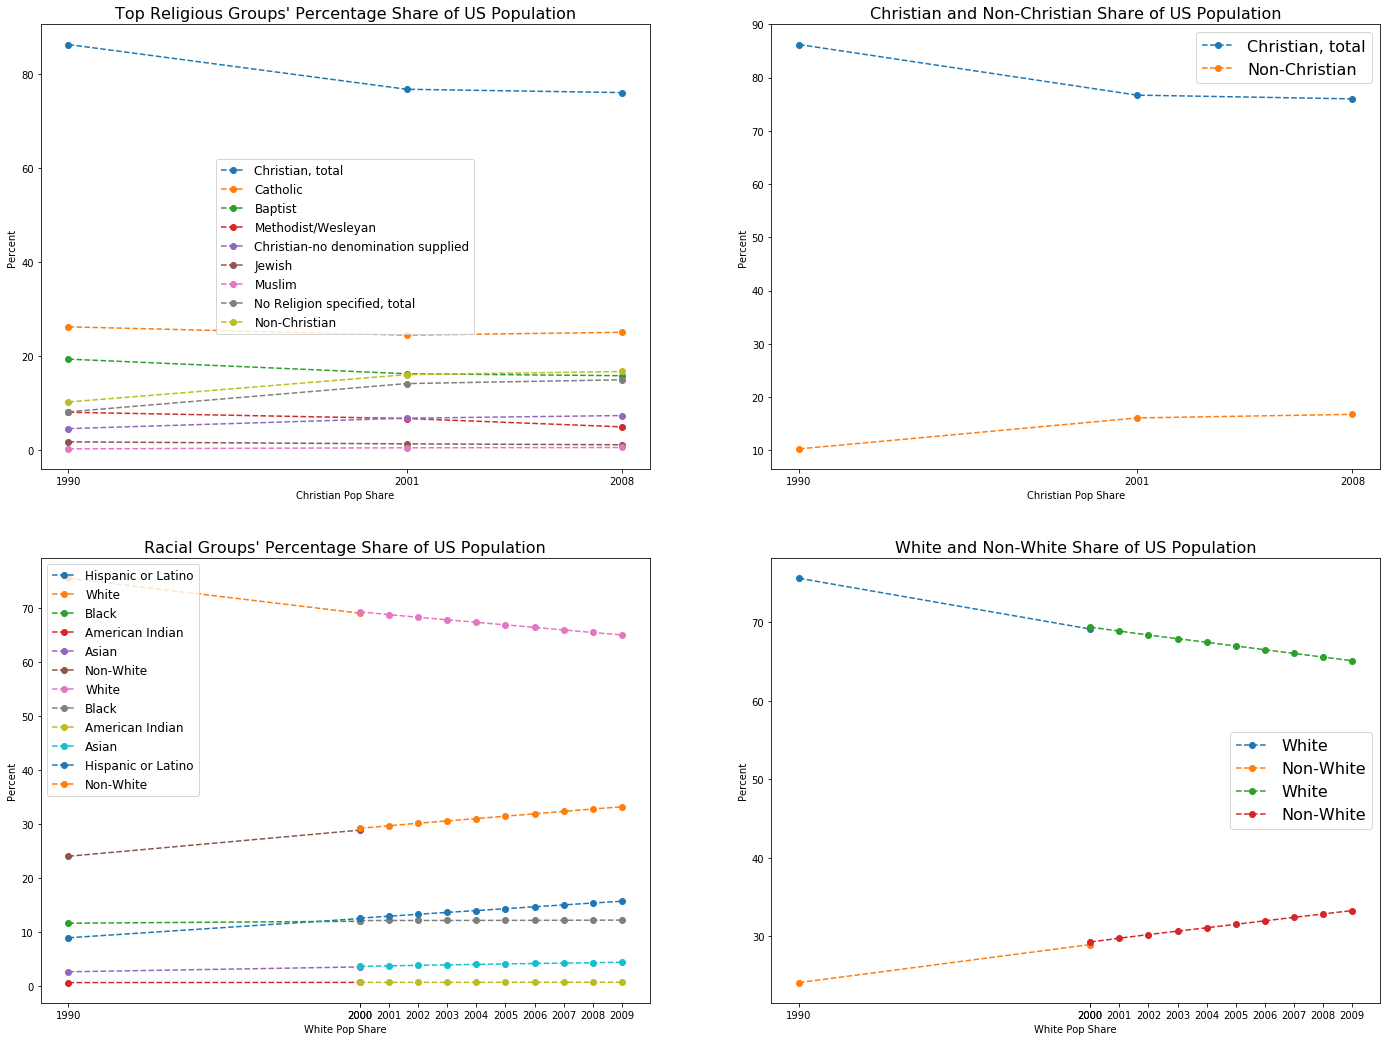

In [31]:
for group in TopReligions_df.index:
    groups_dict[group] = list(TopReligions_df[TopReligions_df.index
                                              == group][TopReligions_df.columns[0:7:2]].iloc[0])
    TopReligions_TL.plot(years,groups_dict[group],linestyle='dashed',marker='o',label=group)
    
TopReligions_TL.set_xticks(years)
TopReligions_TL.legend(prop = {'size':12})
TopReligions_TL.set_title('Top Religious Groups\' Percentage Share of US Population',fontsize=16)
TopReligions_TL.set_xlabel('Christian Pop Share')
TopReligions_TL.set_ylabel('Percent')


for race in PopByRace2000_df.index:
    RacePop_ML.plot(census1,[PopByRace2000_df.loc[race,'1990 Census']['Percent'],
                      PopByRace2000_df.loc[race,'Census 2000']['Percent']],
             linestyle='dashed',marker='o',label=race)

for race in PopByRace2009_df.index:
    # use mask for each group, slice only percentage subcolumn from each year column
    groups_dict[race] = list(PopByRace2009_df[PopByRace2009_df.index
                                              == race][PopByRace2009_df.columns[0:21:2]].iloc[0])
    RacePop_ML.plot(census2,groups_dict[race],linestyle='dashed',marker='o',label=race)

RacePop_ML.set_xticks(census1 + census2)
RacePop_ML.legend(prop = {'size':12})
RacePop_ML.set_title('Racial Groups\' Percentage Share of US Population',fontsize=16)
RacePop_ML.set_xlabel('White Pop Share')
RacePop_ML.set_ylabel('Percent')


for group in ['Christian, total','Non-Christian']:
    # use mask for each group, slice only percentage subcolumn from each year column
    groups_dict[group] = list(TopReligions_df[TopReligions_df.index
                                              == group][TopReligions_df.columns[0:7:2]].iloc[0])
    Christian_TR.plot(years,groups_dict[group],linestyle='dashed',marker='o',label=group)

Christian_TR.set_xticks(years)
Christian_TR.legend(prop = {'size':16})
Christian_TR.set_title('Christian and Non-Christian Share of US Population',fontsize=16)
Christian_TR.set_xlabel('Christian Pop Share')
Christian_TR.set_ylabel('Percent')


for race in ['White','Non-White']:
    White_MR.plot(census1,[PopByRace2000_df.loc[race,'1990 Census']['Percent'],
                      PopByRace2000_df.loc[race,'Census 2000']['Percent']],
             linestyle='dashed',marker='o',label=race)

for race in ['White','Non-White']:
    groups_dict[race] = list(PopByRace2009_df[PopByRace2009_df.index
                                              == race][PopByRace2009_df.columns[0:21:2]].iloc[0])
    White_MR.plot(census2,groups_dict[race],linestyle='dashed',marker='o',label=race)

White_MR.set_xticks(census1 + census2)
White_MR.legend(prop = {'size':16})
White_MR.set_title('White and Non-White Share of US Population',fontsize=16)
White_MR.set_xlabel('White Pop Share')
White_MR.set_ylabel('Percent')


plt.show()

##### 